In [3]:
### Consider following code to answer further questions:
import pandas as pd
course_name = ['Data Science', 'Machine Learning', 'Big Data', 'Data Engineer']
duration = [2,3,6,4]
df = pd.DataFrame(data = {'course_name' : course_name, 'duration' : duration})

### Q1. Write a code to print the data present in the second row of the dataframe, df.

In [4]:
print(df.iloc[1])


course_name    Machine Learning
duration                      3
Name: 1, dtype: object


### Q2. What is the difference between the functions loc and iloc in pandas.DataFrame?

- **`loc`**: Used for label-based indexing. It requires the row or column labels (names) to be specified. It includes the end label in the result.
  - Example: `df.loc[1]` would return the row with index label 1.

- **`iloc`**: Used for integer-based indexing. It requires integer positions (indices) to be specified. It does not include the end index in the result.
  - Example: `df.iloc[1]` would return the second row of the DataFrame.


### Q3. Reindex the given dataframe using a variable, reindex = [3,0,1,2] and store it in the variable, new_df then find the output for both new_df.loc[2] and new_df.iloc[2].

In [5]:
reindex = [3, 0, 1, 2]
new_df = df.reindex(reindex)

# Print new_df
print(new_df)

# Find values at index 2 using both loc and iloc
print(new_df.loc[2])
print(new_df.iloc[2])


        course_name  duration
3     Data Engineer         4
0      Data Science         2
1  Machine Learning         3
2          Big Data         6
course_name    Big Data
duration              6
Name: 2, dtype: object
course_name    Machine Learning
duration                      3
Name: 1, dtype: object


### Q4. Write a code to find the following statistical measurements for the above dataframe df1:
(i) mean of each and every column present in the dataframe. <br>
(ii) standard deviation of column, ‘column_2’

In [1]:
import pandas as pd

# Define the DataFrame
course_name = ['Data Science', 'Machine Learning', 'Big Data', 'Data Engineer']
duration = [2, 3, 6, 4]
df = pd.DataFrame(data={'course_name': course_name, 'duration': duration})

# Calculate mean of each numeric column
mean_values = df.select_dtypes(include='number').mean()
print("Mean of each numeric column:")
print(mean_values)

# Standard deviation of 'duration' column
std_dev_duration = df['duration'].std()
print("Standard deviation of 'duration':")
print(std_dev_duration)


Mean of each numeric column:
duration    3.75
dtype: float64
Standard deviation of 'duration':
1.707825127659933


### Q5. Replace the data present in the second row of column, ‘column_2’ by a string variable then find the mean of column, column_2. If you are getting errors in executing it then explain why.
[Hint: To replace the data use df1.loc[] and equate this to string data of your choice.]

In [2]:
import pandas as pd

# Define the DataFrame
data = {
    'column_1': [1, 2, 3, 4],
    'column_2': [10, 20, 30, 40]
}
df1 = pd.DataFrame(data)

# Replace the second row of 'column_2' with a string
df1.loc[1, 'column_2'] = 'string_value'

# Attempt to calculate the mean
try:
    mean_column_2 = df1['column_2'].mean()
except TypeError as e:
    print("Error:", e)


Error: unsupported operand type(s) for +: 'int' and 'str'


C:\Users\Ajay kumar\AppData\Local\Temp\ipykernel_7468\3499205471.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'string_value' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc[1, 'column_2'] = 'string_value'


Explanation:

- Before replacement, both columns are of int64 type.
- After replacing a value in column_2 with a string, the dtype of column_2 changes to object.
- The mean calculation raises a TypeError because arithmetic operations are not supported between int and str.
In conclusion, when working with DataFrames in pandas, ensure that columns intended for arithmetic operations remain numeric in dtype. If you need to handle mixed data types, consider filtering or converting data appropriately before performing such calculations.

### Q6. What do you understand about the windows function in pandas and list the types of windows functions?

#### Windows function in Pandas: 
Window functions in pandas provide tools for performing operations over a sliding window of data. They are particularly useful for time-series data.

#### Types of Window Functions:

1. Rolling Window: Applies a function over a sliding window. For example: <br>
df.rolling(window=3).mean() <br>
2. Expanding Window: Applies a function over an expanding window. For example: <br>
df.expanding(min_periods=1).mean() <br>
3. Exponentially Weighted Window: Applies exponentially weighted calculations. For example: <br>
df.ewm(span=3).mean()

### Q7. Write a code to print only the current month and year at the time of answering this question. [Hint: Use pandas.datetime function]

In [5]:
import pandas as pd

# Get the current timestamp
current_timestamp = pd.Timestamp.now()

# Extract current month and year
current_month = current_timestamp.month
current_year = current_timestamp.year

print(f"Current Month: {current_month}")
print(f"Current Year: {current_year}")


Current Month: 7
Current Year: 2024


### Q8. Write a Python program that takes in two dates as input (in the format YYYY-MM-DD) and calculates the difference between them in days, hours, and minutes using Pandas time delta. The program should prompt the user to enter the dates and display the result.

In [6]:
import pandas as pd

def calculate_date_difference(date1, date2):
    # Convert string dates to pandas Timestamp
    timestamp1 = pd.Timestamp(date1)
    timestamp2 = pd.Timestamp(date2)
    
    # Calculate the difference
    delta = timestamp2 - timestamp1
    
    # Extract days, hours, and minutes
    days = delta.days
    hours = delta.components.hours
    minutes = delta.components.minutes
    
    return days, hours, minutes

# Example usage
date1 = input("Enter the first date (YYYY-MM-DD): ")
date2 = input("Enter the second date (YYYY-MM-DD): ")

days, hours, minutes = calculate_date_difference(date1, date2)
print(f"Difference: {days} days, {hours} hours, {minutes} minutes")


Enter the first date (YYYY-MM-DD):  2024-07-30
Enter the second date (YYYY-MM-DD):  2024-07-29


Difference: -1 days, 0 hours, 0 minutes


### Q9. Write a Python program that reads a CSV file containing categorical data and converts a specified column to a categorical data type. The program should prompt the user to enter the file path, column name, and category order, and then display the sorted data.

In [12]:
import pandas as pd

def convert_to_categorical(file_path, column_name, category_order):
    try:
        # Read the CSV file
        df = pd.read_csv(file_path.strip('"'))
        
        # Convert the specified column to a categorical data type with the given order
        df[column_name] = pd.Categorical(df[column_name], categories=category_order, ordered=True)
        
        # Sort the DataFrame by the categorical column
        df_sorted = df.sort_values(by=column_name)
        
        return df_sorted
    except FileNotFoundError:
        print("The file was not found. Please check the file path and try again.")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    # Prompt the user for the file path, column name, and category order
    file_path = input("Enter the CSV file path: ")
    column_name = input("Enter the column name to convert to categorical: ")
    category_order = input("Enter the category order (comma-separated): ").split(",")
    
    # Convert to categorical and sort the data
    sorted_df = convert_to_categorical(file_path, column_name, category_order)
    
    # Display the sorted data
    if sorted_df is not None:
        print("Sorted DataFrame:")
        print(sorted_df)


Enter the CSV file path:  "D:/Downloaded/data.csv"
Enter the column name to convert to categorical:  Role
Enter the category order (comma-separated):  Analyst,Developer,Manager


Sorted DataFrame:
      Name       Role
2  Charlie    Analyst
1      Bob  Developer
4      Eve  Developer
0    Alice    Manager
3    David    Manager


### Q10. Write a Python program that reads a CSV file containing sales data for different products and visualizes the data using a stacked bar chart to show the sales of each product category over time. The program should prompt the user to enter the file path and display the chart.

Enter the CSV file path:  "D:/Downloaded/Sales_data.csv"


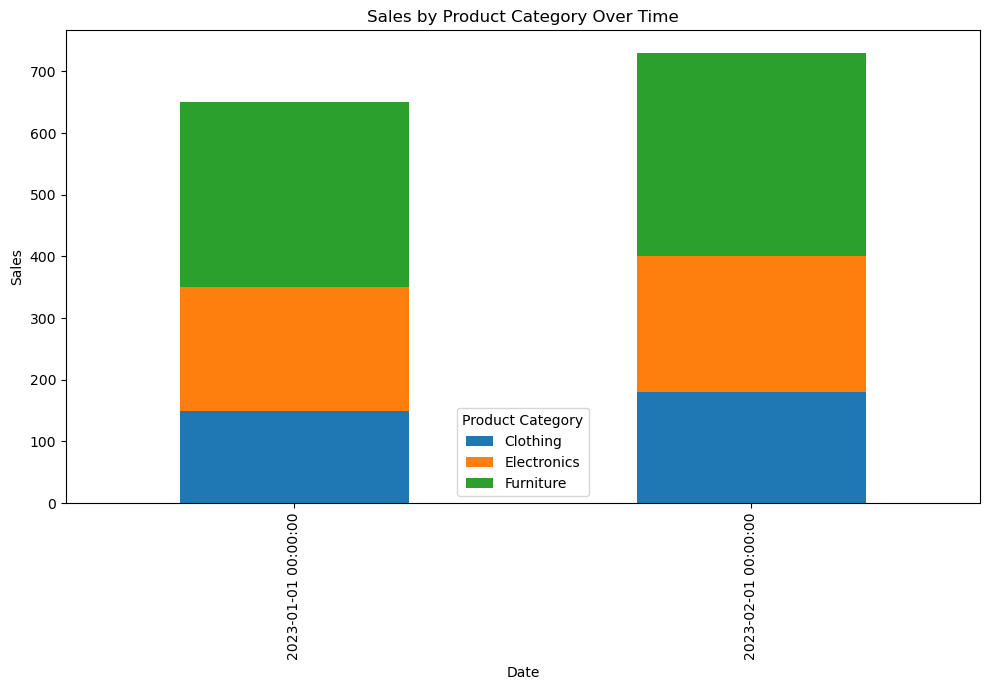

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_sales(file_path):
    try:
        # Read the CSV file
        df = pd.read_csv(file_path.strip('"'))
        
        # Ensure the 'Date' column is in datetime format
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'])
        
        # Pivot the data to get categories as columns and dates as index
        pivot_df = df.pivot_table(index='Date', columns='Product Category', values='Sales', aggfunc='sum').fillna(0)
        
        # Plot the stacked bar chart
        pivot_df.plot(kind='bar', stacked=True, figsize=(10, 7))
        
        # Set plot labels and title
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.title('Sales by Product Category Over Time')
        plt.legend(title='Product Category')
        
        # Show the plot
        plt.tight_layout()
        plt.show()
        
    except FileNotFoundError:
        print("The file was not found. Please check the file path and try again.")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    # Prompt the user for the file path
    file_path = input("Enter the CSV file path: ")
    
    # Visualize sales data
    visualize_sales(file_path)


### Q11. You are given a CSV file containing student data that includes the student ID and their test score. Write 
a Python program that reads the CSV file, calculates the mean, median, and mode of the test scores, an 
displays the results in a tabl display the results
in a table.

In [19]:
import numpy as np

In [20]:
import pandas as pd
from scipy import stats

def calculate_statistics(file_path):
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path.strip('"'))
        
        # Ensure the 'Test Score' column exists
        if 'Test Score' not in df.columns:
            raise ValueError("The CSV file must contain a 'Test Score' column.")
        
        # Calculate mean, median, and mode
        mean_score = df['Test Score'].mean()
        median_score = df['Test Score'].median()
        mode_scores = stats.mode(df['Test Score'])[0]
        
        # Convert mode_scores to a list if it is not already
        if isinstance(mode_scores, (int, float, np.integer)):
            mode_scores = [mode_scores]
        else:
            mode_scores = mode_scores.tolist()
        
        # Convert mode_scores to a string of comma-separated values
        mode_str = ", ".join(map(str, mode_scores))
        
        # Display the results in a table
        result_df = pd.DataFrame({
            'Statistic': ['Mean', 'Median', 'Mode'],
            'Value': [mean_score, median_score, mode_str]
        })
        
        print("+-----------+--------+")
        print("| Statistic | Value  |")
        print("+-----------+--------+")
        for index, row in result_df.iterrows():
            print(f"| {row['Statistic']:<9} | {row['Value']} |")
        print("+-----------+--------+")
        
    except FileNotFoundError:
        print("The file was not found. Please check the file path and try again.")
    except ValueError as ve:
        print(ve)
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    # Prompt the user for the file path
    file_path = input("Enter the file path of the CSV file containing the student data: ")
    
    # Calculate and display statistics
    calculate_statistics(file_path)


Enter the file path of the CSV file containing the student data:  "D:/Downloaded/student_data.csv"


+-----------+--------+
| Statistic | Value  |
+-----------+--------+
| Mean      | 83.5 |
| Median    | 85.0 |
| Mode      | 85 |
+-----------+--------+
